In [4]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imbalanced_learn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.layers import Dense

import matplotlib.pyplot as plt








ModuleNotFoundError: No module named 'imbalanced_learn'

In [16]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)

df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])



Counter({'N': 148, 'Y': 332})

In [17]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)
dummy_X = pd.get_dummies(pre_X)
dummy_y = pre_y.map(dict(Y=1, N=0))
pre_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban


In [18]:
smote = SMOTE(sampling_strategy = 'minority')
X1, y = smote.fit_resample(dummy_X, dummy_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X

array([[0.33333333, 0.05482993, 0.0445666 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03525046, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.03009276, 0.06968703, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.56163893, 0.01757576, 0.06289048, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03497835, 0.04931806, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.11062461, 0.16543133, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
model.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = model.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 202us/sample - loss: 0.2669 - acc: 0.8983


[0.26686794112967904, 0.89830506]

In [30]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)



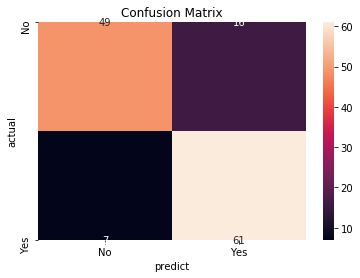

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('predict');
ax.set_ylabel('actual');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']);
ax.yaxis.set_ticklabels(['No', 'Yes']);

In [34]:
import pickle
import joblib
filename = 'loan_model.pkl'
with open('loan_model.pickle', 'wb') as f:
    pickle.dump(model, f)


NotImplementedError: numpy() is only available when eager execution is enabled.

In [27]:
mdl = joblib.load('loan_model.pkl')